In [9]:
import os,shutil

In [10]:
og_dataset_dir = '/Users/arth/Desktop/ML/fc_examples/catsVdogs_train'

In [11]:
small_dataset_dir = '/Users/arth/Desktop/ML/fc_examples/cvd_small_train'
if not os.path.exists(small_dataset_dir):
    os.mkdir(small_dataset_dir)

In [12]:
train_dir = os.path.join(small_dataset_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(small_dataset_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(small_dataset_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [13]:
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

In [14]:
# TODO: To check whether train,val, test dataset have been defined
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(og_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
len(os.listdir(test_dogs_dir))

500

In [17]:
from keras import models,layers

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer= optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir,target_size = (150,150), batch_size=20,class_mode= 'binary')
validation_generator = test_datagen.flow_from_directory( validation_dir ,target_size = (150,150), batch_size=20,class_mode= 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break


(20, 150, 150, 3)
(20,)


In [24]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=5,validation_data=validation_generator,validation_steps=50)

Epoch 1/5
100/100 [==============================] - 78s 779ms/step - loss: 0.6562 - acc: 0.6160 - val_loss: 0.6502 - val_acc: 0.6210
Epoch 2/5
100/100 [==============================] - 80s 805ms/step - loss: 0.6408 - acc: 0.6375 - val_loss: 0.7086 - val_acc: 0.5270
Epoch 3/5
100/100 [==============================] - 76s 764ms/step - loss: 0.6257 - acc: 0.6510 - val_loss: 0.6380 - val_acc: 0.6320
Epoch 4/5
100/100 [==============================] - 76s 759ms/step - loss: 0.6059 - acc: 0.6665 - val_loss: 0.6155 - val_acc: 0.6680
Epoch 5/5
100/100 [==============================] - 76s 762ms/step - loss: 0.5937 - acc: 0.6845 - val_loss: 0.6105 - val_acc: 0.6680


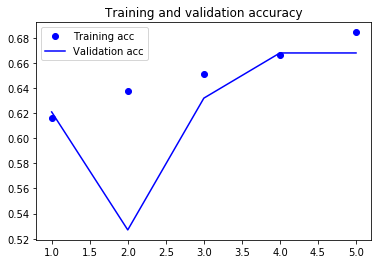

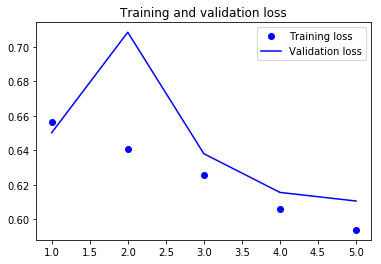

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

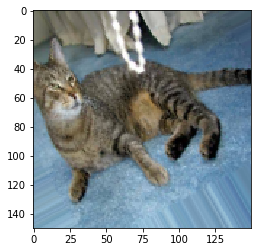

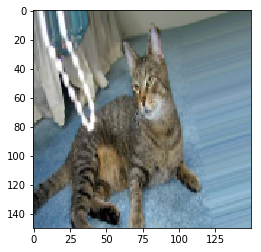

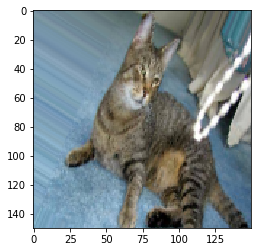

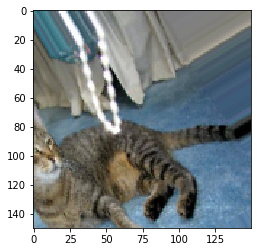

In [32]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir) ]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x= x.reshape((1,) +x.shape )

i=0

for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    implot = plt.imshow(image.array_to_img(batch[0]))
    i= i+1
    if (i%4==0):
        break
        
plt.show()

In [37]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape=(150,150,3)))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(32,(3, 3), activation='relu'))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(32,(3, 3), activation='relu'))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(32,(3, 3), activation='relu'))
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer= optimizers.RMSprop(lr=1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,batch_size = 20,target_size = (150,150), class_mode='binary' )
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history2 =model2.fit_generator(train_generator,epochs =10, steps_per_epoch=100,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 82s 817ms/step - loss: 0.6928 - acc: 0.5125 - val_loss: 0.6897 - val_acc: 0.4990
Epoch 2/10
100/100 [==============================] - 79s 790ms/step - loss: 0.6900 - acc: 0.5275 - val_loss: 0.6823 - val_acc: 0.5350
Epoch 3/10
100/100 [==============================] - 79s 790ms/step - loss: 0.6850 - acc: 0.5440 - val_loss: 0.6887 - val_acc: 0.5050
Epoch 4/10
100/100 [==============================] - 78s 783ms/step - loss: 0.6793 - acc: 0.5635 - val_loss: 0.6622 - val_acc: 0.6050
Epoch 5/10
100/100 [==============================] - 79s 785ms/step - loss: 0.6721 - acc: 0.5725 - val_loss: 0.6540 - val_acc: 0.6030
Epoch 6/10
100/100 [==============================] - 79s 792ms/step - loss: 0.6681 - acc: 0.5830 - val_loss: 0.6482 - val_acc: 0.6140
Epoch 7/10
100/100 [==============================] - 79s 789ms/step - loss: 0.6622 - acc: 0.5940 - val_lo

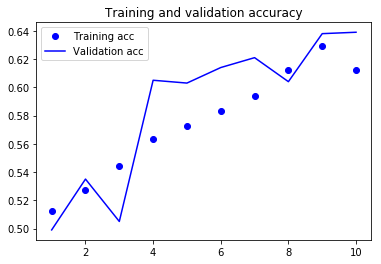

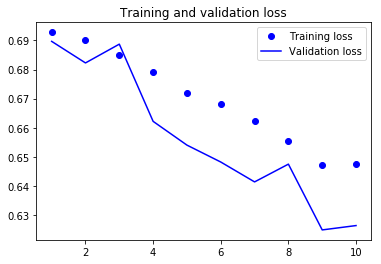

In [38]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()